## 📘 Linear Regression with PyTorch
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/pytorch_linear_regression.ipynb)

This notebook:
- Generates simple 2D linear data (`y = 3x + 2 + noise`).
- Uses PyTorch to fit a **linear regression model**.
- Visualizes the dataset and the fitted line.



In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Check if PyTorch is installed
print("Torch version:", torch.__version__)


Torch version: 1.10.1


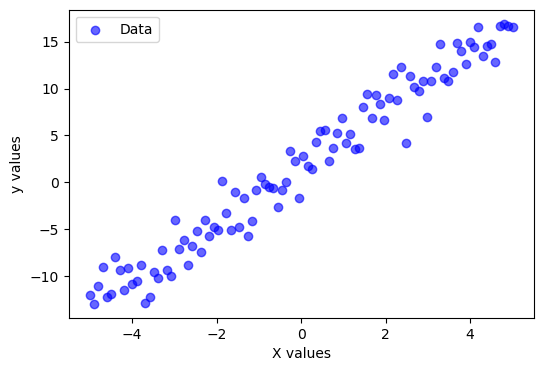

In [2]:
# Generate synthetic 2D data: y = 3x + 2 + noise
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # 100 points between -5 and 5
y = 3 * X + 2 + np.random.randn(*X.shape) * 2  # Adding noise

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Plot the dataset
plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()


In [3]:
# Define a simple linear regression model
model = nn.Linear(1, 1)  # 1 input feature -> 1 output feature

# Define loss function (Mean Squared Error) and optimizer (SGD)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_pred = model(X_tensor)  # Forward pass
    loss = criterion(y_pred, y_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Print loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [50/500], Loss: 3.3855
Epoch [100/500], Loss: 3.2763
Epoch [150/500], Loss: 3.2618
Epoch [200/500], Loss: 3.2599
Epoch [250/500], Loss: 3.2597
Epoch [300/500], Loss: 3.2596
Epoch [350/500], Loss: 3.2596
Epoch [400/500], Loss: 3.2596
Epoch [450/500], Loss: 3.2596
Epoch [500/500], Loss: 3.2596


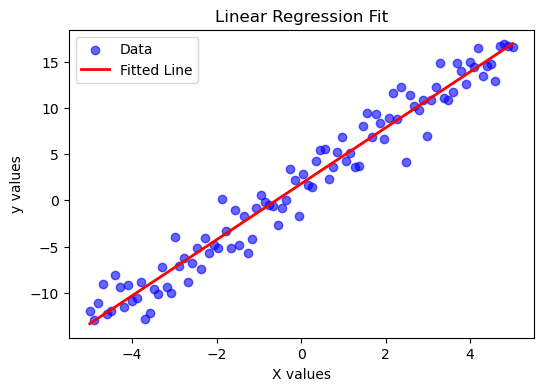

In [4]:
# Get model predictions
with torch.no_grad():  # No need to track gradients
    y_fit = model(X_tensor)

# Plot the final fit
plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Data", color="blue", alpha=0.6)
plt.plot(X, y_fit.numpy(), label="Fitted Line", color="red", linewidth=2)
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()
